<a href="https://colab.research.google.com/github/vest1ter/machin_learning/blob/master/mnistPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2
import os
import torch.nn.functional as F
import torchvision as tv
import numpy as np

from tqdm import tqdm

In [6]:
trans = tv.transforms.Compose([tv.transforms.ToTensor()])

In [7]:
ds_mnist = tv.datasets.MNIST("./datasets", download = True, transform=trans)

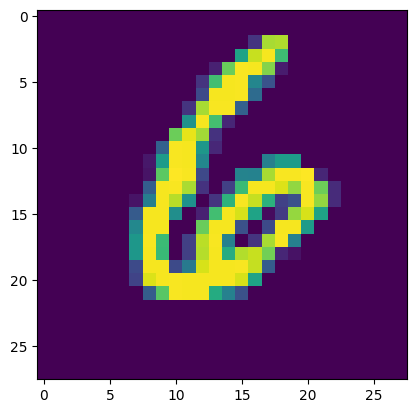

In [152]:
tes = (ds_mnist[13][0].numpy()[0])

tes = torch.from_numpy(tes)
plt.imshow(tes)

In [24]:
BATCH = 16
dataloader = torch.utils.data.DataLoader(ds_mnist, batch_size = BATCH, shuffle = True, drop_last=True)

In [49]:
for img, label in dataloader:
  print(img.shape)
  print(label.shape)
  break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [157]:
class Numbers(nn.Module):
  def __init__(self):
    super().__init__()
    self.flat = nn.Flatten()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 10)
    self.b = nn.Parameter(torch.ones(10), requires_grad=True)
    self.activate = nn.ReLU()


  def forward(self, x):
    out = self.flat(x)
    out = self.linear1(out)
    out = self.activate(out)
    out = self.linear2(out)
    out = self.activate(out)
    out = out + self.b

    return out

In [158]:
model = Numbers()

In [159]:
loss_fn = nn.CrossEntropyLoss()

In [160]:
optimazer = torch.optim.SGD(model.parameters(), lr = 1e-3, momentum = 0.9)

In [161]:
label.argmax()

tensor(7)

In [162]:
def accuracy(pred, label):
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
  return answer.mean()

In [163]:
epochs =1#

for epoch in range(epochs):#
  loss_val=0 #
  acc_val = 0#
  for img, label in tqdm(dataloader):
    optimazer.zero_grad()
    label = F.one_hot(label, 10).float() #конвертитруем цифры в вектор вероятности
    pred = model(img)

    loss = loss_fn(pred, label)

    loss.backward()

    loss_val +=loss.item()
    acc_current = accuracy(pred, label)
    acc_val +=acc_current

    optimazer.step()
  print(loss_val/len(dataloader))
  print(acc_val/len(dataloader))

  0%|          | 0/3750 [00:00<?, ?it/s]<ipython-input-162-0dbe26ece616>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)
100%|██████████| 3750/3750 [00:11<00:00, 334.57it/s]

0.9713817394137383
0.7096333333333333


In [164]:
accuracy(pred, label)

<ipython-input-162-0dbe26ece616>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  answer = F.softmax(pred.detach()).numpy().argmax(1) == label.numpy().argmax(1)


0.6875

In [165]:
img = cv2.imread('/content/testimg.png', cv2.IMREAD_GRAYSCALE)
img = np.expand_dims(img, axis = 0)
img = np.expand_dims(img, axis = 0)
img =img.astype(np.float32)/255.0

img = torch.from_numpy(img)

In [167]:
nash_pred = model(img)
F.softmax(nash_pred).detach().numpy().argmax()

<ipython-input-167-8d64c7f95c21>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred).detach().numpy().argmax()


9

In [170]:
img_test = ds_mnist[12][0].numpy()
img_test = np.expand_dims(img_test, axis = 0)
img_test = torch.from_numpy(img_test)

In [171]:
nash_pred2 = model(img_test)
F.softmax(nash_pred2).detach().numpy().argmax()

<ipython-input-171-e0d0e65e9407>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(nash_pred2).detach().numpy().argmax()


3